In [1]:
import numpy as np
import pandas as pd
from Bio import Phylo
from cStringIO import StringIO
import matplotlib
import matplotlib.pyplot as plt

In [2]:
path = './series2/mage_2/mut-whole-mstd_1.00-mage_2.csv'

pop = pd.read_csv(path)
pop.parent_id[pop.parent_id < 0] = np.nan
n_ages = pop.age.unique().size

/home/asajina/pyenvs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Build phylogeny tree in Newick format from population dataframe

In [3]:
def id_to_newick_dist(p_data,p,root,stop_nodes=[]):
    items = []
    
    root_data = p_data[p_data.id==root][:n_ages]
    root_d = root_data.death.values
    root_b = root_data.reproduction.values
    
    for node in p[np.logical_and(p.parent_id==root, p.id!=root)].id.values:
        s = ''
        if p[np.logical_and(p.parent_id==node, p.id!=node)].id.values.size > 0 and node not in stop_nodes:
            sub_tree = id_to_newick_dist(p_data,p,node)
            if sub_tree != '':
                s += '(' + sub_tree + ')'
        
        node_data = p_data[p_data.id==node][:n_ages]
        node_d = node_data.death.values
        node_b = node_data.reproduction.values
        distance = np.sum(root_d != node_d) + np.sum(root_b != node_b)
        #print node,': ',distance
        
        s += str(node) + ':' + str(distance)
        #print s
        items.append(s)
    return ','.join(items)

In [4]:
def id_to_newick(p,root,stop_nodes=[]):
    items = []
    
    for node in p[np.logical_and(p.parent_id==root, p.id!=root)].id.values:
        s = ''
        if p[np.logical_and(p.parent_id==node, p.id!=node)].id.values.size > 0 and node not in stop_nodes:
            sub_tree = id_to_newick(p,node)
            if sub_tree != '':
                s += '(' + sub_tree + ')'
        
        s += str(node)
        items.append(s)
    return ','.join(items)

In [5]:
def find_parent(p, _id):
    if id==0: return np.nan
    return p[p.id==_id].parent_id.unique()[0]

# Find most frequent IDs among living

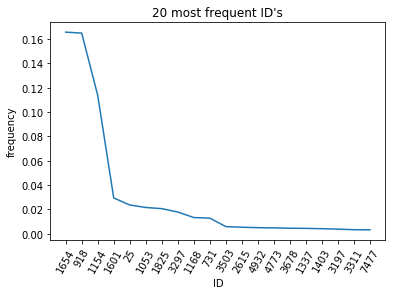

In [171]:
p = pop[np.logical_and(pop.age==0,pop.alive == 1)]
u,c = np.unique(p.id, return_counts=True)
sort_ix = np.argsort(c)[::-1] # ascending

how_many = 20

xlabel = u[sort_ix]
y = (c[sort_ix]/float(np.sum(c)))[:how_many]
plt.plot(y)
plt.xticks(np.arange(how_many), xlabel[:how_many], rotation=60)
plt.xlabel('ID')
plt.ylabel('frequency')
plt.title("20 most frequent ID's")
plt.savefig('/home/asajina/repos/thesis-paper/figures/phylo1.png', dpi=600)

#ten_most = u[sort_ix][:10] # ten most numerous IDs
#p_ten_most = p[p.id.isin(ten_most)]
#print ten_most
#print np.around(c[sort_ix][:10]/float(p.id.size),4)

In [196]:
np.sum(y[:5])

0.49694378569758507

In [50]:
# print absolute numbers
totn = {}
for ix in sort_ix:
    totn[str(u[ix])] = c[ix]
    print '{0}:\t\t {1}'.format(u[ix], c[ix])

1654:		 9911
918:		 9865
1154:		 6807
1601:		 1759
25:		 1414
1053:		 1292
1825:		 1235
3297:		 1068
1168:		 796
731:		 769
3503:		 351
2615:		 320
4932:		 299
4773:		 289
3678:		 273
1337:		 265
1403:		 249
3197:		 228
3311:		 199
7477:		 193
1619:		 189
4701:		 177
2660:		 175
2103:		 164
2337:		 163
5496:		 162
997:		 157
7181:		 152
3022:		 148
2567:		 145
5784:		 144
4528:		 139
4955:		 136
4424:		 132
4032:		 123
6809:		 111
3614:		 110
2344:		 108
4408:		 106
1377:		 105
4818:		 105
2096:		 103
6982:		 101
1916:		 100
3116:		 100
2931:		 97
3628:		 96
2165:		 95
3035:		 91
7202:		 91
2923:		 91
5915:		 88
6217:		 87
10414:		 87
3549:		 86
2083:		 84
2439:		 80
11219:		 80
5275:		 77
7952:		 74
2022:		 71
3202:		 70
4760:		 69
6421:		 69
7787:		 68
548:		 67
1999:		 65
356:		 64
3632:		 64
1132:		 61
8911:		 61
8332:		 60
9860:		 59
4733:		 58
5244:		 58
3915:		 58
11438:		 58
7736:		 58
4170:		 57
9710:		 55
9475:		 54
8373:		 54
1595:		 54
4431:		 53
5332:		 53
12749:		 52
3595

18580:		 6
237:		 6
15303:		 6
11307:		 6
12875:		 6
4986:		 6
12579:		 6
18534:		 6
11304:		 6
12578:		 6
12109:		 6
19174:		 6
12602:		 6
18437:		 6
3445:		 6
3442:		 6
12726:		 6
4064:		 6
19231:		 6
14963:		 6
11197:		 6
12300:		 6
11189:		 6
18668:		 6
4274:		 6
11886:		 6
14759:		 6
3233:		 6
12425:		 6
18648:		 6
18644:		 6
11164:		 6
19170:		 6
4335:		 6
18985:		 6
18420:		 6
15164:		 6
18417:		 6
15089:		 6
14039:		 6
17597:		 6
16066:		 6
13532:		 6
17179:		 6
16051:		 6
10153:		 6
17165:		 6
15962:		 6
10279:		 6
17100:		 6
17915:		 6
15856:		 6
17961:		 6
6660:		 6
6459:		 6
15806:		 6
9129:		 6
10079:		 6
10044:		 6
18118:		 6
7294:		 6
16319:		 6
17484:		 6
19654:		 6
16287:		 6
16382:		 6
17346:		 6
19950:		 6
16181:		 6
13722:		 6
12911:		 6
17315:		 6
17265:		 6
9975:		 6
16081:		 6
17199:		 6
16866:		 6
13786:		 6
13052:		 6
13021:		 6
13172:		 6
16738:		 6
13187:		 6
16912:		 6
16731:		 6
13923:		 6
13050:		 6
15479:		 6
8614:		 6
15591:		 6
16744:		 6
18190:		 6
615

17906:		 2
19069:		 2
13347:		 2
17892:		 2
17977:		 2
18002:		 2
18006:		 2
18016:		 2
19081:		 2
10668:		 2
10639:		 2
19434:		 2
18869:		 2
19449:		 2
18110:		 2
18107:		 2
18104:		 2
18094:		 2
18090:		 2
18068:		 2
18064:		 2
19464:		 2
19472:		 2
11052:		 2
12865:		 2
18887:		 2
18563:		 2
18615:		 2
18612:		 2
18593:		 2
19181:		 2
18589:		 2
18731:		 2
11522:		 2
18562:		 2
11288:		 2
12316:		 2
18554:		 2
18744:		 2
18552:		 2
19202:		 2
11294:		 2
19132:		 2
19179:		 2
12507:		 2
18621:		 2
19146:		 2
18687:		 2
18706:		 2
19154:		 2
18673:		 2
18670:		 2
19155:		 2
19156:		 2
19164:		 2
18659:		 2
18707:		 2
12466:		 2
18639:		 2
18634:		 2
18709:		 2
12469:		 2
18530:		 2
19214:		 2
12836:		 2
19280:		 2
19267:		 2
19268:		 2
18434:		 2
11172:		 2
18430:		 2
11157:		 2
18423:		 2
18415:		 2
12302:		 2
18806:		 2
11147:		 2
18830:		 2
18833:		 2
18396:		 2
12806:		 2
19287:		 2
11188:		 2
18793:		 2
19262:		 2
18789:		 2
19223:		 2
11226:		 2
18506:		 2
18490:		 2
12660:		 2

20337:		 1
20338:		 1
20339:		 1
20340:		 1
20343:		 1
20344:		 1
20345:		 1
20346:		 1
20311:		 1
20309:		 1
20268:		 1
20291:		 1
20270:		 1
20271:		 1
20274:		 1
20276:		 1
20278:		 1
20279:		 1
20280:		 1
20285:		 1
20286:		 1
20287:		 1
20288:		 1
20289:		 1
20290:		 1
20292:		 1
20308:		 1
20293:		 1
20294:		 1
20295:		 1
20296:		 1
20297:		 1
20299:		 1
20300:		 1
20301:		 1
20302:		 1
20304:		 1
20305:		 1
20306:		 1
20307:		 1
19594:		 1
19592:		 1
14674:		 1
19586:		 1
17868:		 1
17874:		 1
17878:		 1
17884:		 1
17887:		 1
17888:		 1
17889:		 1
17895:		 1
17910:		 1
17918:		 1
17925:		 1
17929:		 1
17932:		 1
17941:		 1
17949:		 1
17965:		 1
17972:		 1
17976:		 1
17995:		 1
17997:		 1
18008:		 1
18027:		 1
18062:		 1
18085:		 1
18121:		 1
18133:		 1
18136:		 1
18147:		 1
18171:		 1
17865:		 1
17863:		 1
17851:		 1
17739:		 1
17591:		 1
17604:		 1
17605:		 1
17610:		 1
17621:		 1
17623:		 1
17646:		 1
17659:		 1
17660:		 1
17661:		 1
17663:		 1
17667:		 1
17732:		 1
17752:		 1

# Phylogeny analysis

In [8]:
import time
start = time.time()

root = 0
# this might take a while
#tree = Phylo.read(StringIO('('+id_to_newick(pop[pop.age==0],root)+')' + str(root)),'newick')
tree = Phylo.read(StringIO('('+id_to_newick_dist(pop,pop[pop.age==0],root)+')'+str(root)),'newick')

print (time.time() - start) / 60

19.0565801501


In [9]:
import copy
tree_sc = copy.deepcopy(tree)

In [10]:
tree = copy.deepcopy(tree_sc)

In [11]:
for clade in tree.find_clades():
    if not clade.name:
        clade.name = str(clade.confidence)

In [12]:
living = pop[np.logical_and(pop.age==0, pop.alive==1)].id.unique().astype(str)
print len(living)

3167


In [20]:
mrca = tree.common_ancestor(u[sort_ix][:15].astype(str))
#mrca = tree.common_ancestor(living.astype(str))
print mrca

25


## find out more about ID 25, find living children etc

In [21]:
print pop[pop.id == 25].birth_date.min() # when did this mutant first enter populaiton

0.090848199887849


In [22]:
import time
start = time.time()

root = 25
# this might take a while
tree2 = Phylo.read(StringIO('('+id_to_newick_dist(pop,pop[pop.age==0],root)+')'+str(root)),'newick')

print (time.time() - start) / 60

15.0902122498


In [37]:
for clade in tree2.find_clades():
    if not clade.name:
        clade.name = str(clade.confidence)

In [24]:
# first order descendents interesct with living
start = time.time()
living = pop[np.logical_and(pop.age==0, pop.alive==1)].id.unique()
L = {}
c = 0
for idd in living:
    L[idd] = len(pop[np.logical_and(pop.parent_id==idd, pop.alive==1)].id.unique())
    c += 1
    print c
    
print (time.time() - start) / 60

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


In [25]:
listofTuples = sorted(L.items() , reverse=True, key=lambda x: x[1])
 
# Iterate over the sorted sequence
for elem in listofTuples :
    print(elem[0] , " ::" , elem[1] )    

(918, ' ::', 224)
(1654, ' ::', 188)
(1154, ' ::', 140)
(1601, ' ::', 46)
(25, ' ::', 36)
(1053, ' ::', 32)
(1825, ' ::', 29)
(3297, ' ::', 18)
(1168, ' ::', 17)
(4932, ' ::', 14)
(731, ' ::', 13)
(2103, ' ::', 9)
(2615, ' ::', 9)
(1403, ' ::', 8)
(3503, ' ::', 8)
(3035, ' ::', 7)
(3678, ' ::', 7)
(3628, ' ::', 6)
(4424, ' ::', 6)
(1916, ' ::', 5)
(4032, ' ::', 5)
(4701, ' ::', 5)
(4733, ' ::', 5)
(4773, ' ::', 5)
(4955, ' ::', 5)
(7477, ' ::', 5)
(997, ' ::', 4)
(1337, ' ::', 4)
(1619, ' ::', 4)
(2022, ' ::', 4)
(10241, ' ::', 4)
(2337, ' ::', 4)
(2931, ' ::', 4)
(3022, ' ::', 4)
(3116, ' ::', 4)
(11438, ' ::', 4)
(3391, ' ::', 4)
(5332, ' ::', 4)
(5784, ' ::', 4)
(5915, ' ::', 4)
(6809, ' ::', 4)
(8114, ' ::', 4)
(356, ' ::', 3)
(1377, ' ::', 3)
(16843, ' ::', 3)
(548, ' ::', 3)
(9710, ' ::', 3)
(1999, ' ::', 3)
(10332, ' ::', 3)
(10609, ' ::', 3)
(2567, ' ::', 3)
(10794, ' ::', 3)
(11068, ' ::', 3)
(19382, ' ::', 3)
(11219, ' ::', 3)
(3197, ' ::', 3)
(3311, ' ::', 3)
(3549, ' ::', 3

(17495, ' ::', 1)
(17496, ' ::', 1)
(1114, ' ::', 1)
(17500, ' ::', 1)
(1117, ' ::', 1)
(16571, ' ::', 1)
(17509, ' ::', 1)
(9319, ' ::', 1)
(16573, ' ::', 1)
(1141, ' ::', 1)
(17529, ' ::', 1)
(17531, ' ::', 1)
(17533, ' ::', 1)
(17535, ' ::', 1)
(17536, ' ::', 1)
(9345, ' ::', 1)
(17544, ' ::', 1)
(17549, ' ::', 1)
(17557, ' ::', 1)
(17562, ' ::', 1)
(17563, ' ::', 1)
(5658, ' ::', 1)
(17567, ' ::', 1)
(17571, ' ::', 1)
(17577, ' ::', 1)
(9388, ' ::', 1)
(17581, ' ::', 1)
(17582, ' ::', 1)
(17587, ' ::', 1)
(17589, ' ::', 1)
(17590, ' ::', 1)
(17591, ' ::', 1)
(17594, ' ::', 1)
(17595, ' ::', 1)
(17597, ' ::', 1)
(17605, ' ::', 1)
(9414, ' ::', 1)
(9415, ' ::', 1)
(17609, ' ::', 1)
(17610, ' ::', 1)
(17613, ' ::', 1)
(17614, ' ::', 1)
(17621, ' ::', 1)
(17622, ' ::', 1)
(17628, ' ::', 1)
(9446, ' ::', 1)
(17652, ' ::', 1)
(17657, ' ::', 1)
(19327, ' ::', 1)
(17663, ' ::', 1)
(17667, ' ::', 1)
(17670, ' ::', 1)
(19329, ' ::', 1)
(17676, ' ::', 1)
(17681, ' ::', 1)
(17682, ' ::', 1)
(1

(5683, ' ::', 1)
(13880, ' ::', 1)
(13904, ' ::', 1)
(13905, ' ::', 1)
(13923, ' ::', 1)
(5732, ' ::', 1)
(5741, ' ::', 1)
(5752, ' ::', 1)
(13946, ' ::', 1)
(5767, ' ::', 1)
(19287, ' ::', 1)
(13972, ' ::', 1)
(13973, ' ::', 1)
(13979, ' ::', 1)
(17349, ' ::', 1)
(13994, ' ::', 1)
(13997, ' ::', 1)
(14014, ' ::', 1)
(5826, ' ::', 1)
(17357, ' ::', 1)
(14032, ' ::', 1)
(5844, ' ::', 1)
(14039, ' ::', 1)
(14040, ' ::', 1)
(14047, ' ::', 1)
(5857, ' ::', 1)
(20092, ' ::', 1)
(9170, ' ::', 1)
(18728, ' ::', 1)
(14070, ' ::', 1)
(14075, ' ::', 1)
(14634, ' ::', 1)
(14093, ' ::', 1)
(14095, ' ::', 1)
(14105, ' ::', 1)
(5921, ' ::', 1)
(14114, ' ::', 1)
(14122, ' ::', 1)
(18201, ' ::', 1)
(14130, ' ::', 1)
(5940, ' ::', 1)
(14134, ' ::', 1)
(5951, ' ::', 1)
(14646, ' ::', 1)
(14150, ' ::', 1)
(14151, ' ::', 1)
(5966, ' ::', 1)
(14166, ' ::', 1)
(14175, ' ::', 1)
(14178, ' ::', 1)
(14183, ' ::', 1)
(14186, ' ::', 1)
(14189, ' ::', 1)
(14194, ' ::', 1)
(14202, ' ::', 1)
(14208, ' ::', 1)
(1421

(19360, ' ::', 0)
(19366, ' ::', 0)
(19612, ' ::', 0)
(19372, ' ::', 0)
(19613, ' ::', 0)
(19386, ' ::', 0)
(19387, ' ::', 0)
(19393, ' ::', 0)
(19399, ' ::', 0)
(19405, ' ::', 0)
(19412, ' ::', 0)
(19414, ' ::', 0)
(19415, ' ::', 0)
(19416, ' ::', 0)
(19417, ' ::', 0)
(19422, ' ::', 0)
(19427, ' ::', 0)
(19430, ' ::', 0)
(19446, ' ::', 0)
(19447, ' ::', 0)
(19452, ' ::', 0)
(19454, ' ::', 0)
(19455, ' ::', 0)
(19456, ' ::', 0)
(19462, ' ::', 0)
(19463, ' ::', 0)
(19470, ' ::', 0)
(19473, ' ::', 0)
(19474, ' ::', 0)
(19475, ' ::', 0)
(19630, ' ::', 0)
(19478, ' ::', 0)
(19479, ' ::', 0)
(19482, ' ::', 0)
(19491, ' ::', 0)
(19493, ' ::', 0)
(19494, ' ::', 0)
(19509, ' ::', 0)
(19511, ' ::', 0)
(19513, ' ::', 0)
(19518, ' ::', 0)
(19519, ' ::', 0)
(19520, ' ::', 0)
(19521, ' ::', 0)
(19525, ' ::', 0)
(19526, ' ::', 0)
(19533, ' ::', 0)
(19534, ' ::', 0)
(19536, ' ::', 0)
(19537, ' ::', 0)
(19546, ' ::', 0)
(19548, ' ::', 0)
(19550, ' ::', 0)
(19551, ' ::', 0)
(19559, ' ::', 0)
(19564, ' 

In [42]:
# descendents of ID 25
desc = tree2.get_nonterminals() + tree2.get_terminals()

In [45]:
desc_names = [clade.name for clade in desc]

In [49]:
living_desc = np.intersect1d(desc_names, living.astype(str))

In [53]:
ss = np.sum([totn[idd] for idd in np.unique(living_desc)])

In [67]:
print ss
print float(ss) / pop[np.logical_and(pop.alive==1, pop.age==0)].shape[0]

58281
0.973329102508


# plot traits of [25, 1654, 918, 1154]

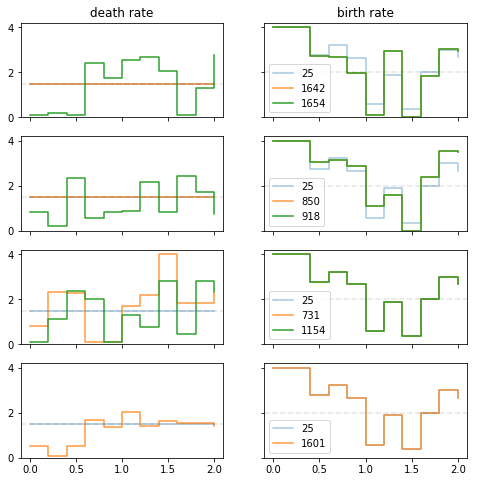

In [200]:
fig, ax = plt.subplots(4,2, figsize=(8,8))#, dpi=600)

pal = sns.color_palette(n_colors=3)

basedeath = pop[pop.id==25].groupby('age').death.unique()
baserepr = pop[pop.id==25].groupby('age').reproduction.unique()

# 25 -> 1642 -> 1654

ax[0][0].step(bio_ages,basedeath,where='post',label='25',color=pal[0],alpha=0.4)
ax[0][0].step(bio_ages,pop[pop.id==1642].groupby('age').death.unique(),where='post',label='1642',color=pal[1],alpha=0.8)
ax[0][0].step(bio_ages,pop[pop.id==1654].groupby('age').death.unique(),where='post',label='1654',color=pal[2])
ax[0][0].xaxis.set_ticklabels([])
ax[0][0].set_ylim(0,4.2)
ax[0][0].set_title('death rate')

ax[0][1].step(bio_ages,baserepr,where='post',label='25',color=pal[0],alpha=0.4)
ax[0][1].step(bio_ages,pop[pop.id==1642].groupby('age').reproduction.unique(),where='post',label='1642',color=pal[1],alpha=0.8)
ax[0][1].step(bio_ages,pop[pop.id==1654].groupby('age').reproduction.unique(),where='post',label='1654',color=pal[2])
ax[0][1].set_ylim(0,4.2)
ax[0][1].xaxis.set_ticklabels([])
ax[0][1].yaxis.set_ticklabels([])
ax[0][1].legend()
ax[0][1].set_title('birth rate')

# 25 -> 850 -> 918

ax[1][0].step(bio_ages,basedeath,where='post',label='25',color=pal[0],alpha=0.4)
ax[1][0].step(bio_ages,pop[pop.id==850].groupby('age').death.unique(),where='post',label='850',color=pal[1],alpha=0.8)
ax[1][0].step(bio_ages,pop[pop.id==918].groupby('age').death.unique(),where='post',label='918',color=pal[2])
ax[1][0].xaxis.set_ticklabels([])
ax[1][0].set_ylim(0,4.2)

ax[1][1].step(bio_ages,baserepr,where='post',label='25',color=pal[0],alpha=0.4)
ax[1][1].step(bio_ages,pop[pop.id==850].groupby('age').reproduction.unique(),where='post',label='850',color=pal[1],alpha=0.8)
ax[1][1].step(bio_ages,pop[pop.id==918].groupby('age').reproduction.unique(),where='post',label='918',color=pal[2])
ax[1][1].xaxis.set_ticklabels([])
ax[1][1].yaxis.set_ticklabels([])
ax[1][1].set_ylim(0,4.2)
ax[1][1].legend()

# 25 -> 731 -> 1154

ax[2][0].step(bio_ages,basedeath,where='post',label='25',color=pal[0],alpha=0.4)
ax[2][0].step(bio_ages,pop[pop.id==731].groupby('age').death.unique(),where='post',label='731',color=pal[1],alpha=0.8)
ax[2][0].step(bio_ages,pop[pop.id==1154].groupby('age').death.unique(),where='post',label='1154',color=pal[2])
ax[2][0].xaxis.set_ticklabels([])
ax[2][0].set_ylim(0,4.2)

ax[2][1].step(bio_ages,baserepr,where='post',label='25',color=pal[0],alpha=0.4)
ax[2][1].step(bio_ages,pop[pop.id==731].groupby('age').reproduction.unique(),where='post',label='731',color=pal[1],alpha=0.8)
ax[2][1].step(bio_ages,pop[pop.id==1154].groupby('age').reproduction.unique(),where='post',label='1154',color=pal[2])
ax[2][1].xaxis.set_ticklabels([])
ax[2][1].yaxis.set_ticklabels([])
ax[2][1].set_ylim(0,4.2)
ax[2][1].legend()

# 25 -> 1601

ax[3][0].step(bio_ages,basedeath,where='post',label='25',color=pal[0],alpha=0.4)
ax[3][0].step(bio_ages,pop[pop.id==1601].groupby('age').death.unique(),where='post',label='1601',color=pal[1],alpha=0.8)
ax[3][0].set_ylim(0,4.2)

ax[3][1].step(bio_ages,baserepr,where='post',label='25',color=pal[0],alpha=0.4)
ax[3][1].step(bio_ages,pop[pop.id==1601].groupby('age').reproduction.unique(),where='post',label='1601',color=pal[1],alpha=0.8)
ax[3][1].yaxis.set_ticklabels([])
ax[3][1].set_ylim(0,4.2)
ax[3][1].legend()

for axis in ax:
    axis[0].axhline(y=1.5, color='black', linestyle='--', alpha=0.1)
    axis[1].axhline(y=2, color='black', linestyle='--', alpha=0.1)
    
fig.savefig('/home/asajina/repos/thesis-paper/figures/phylo2.png', dpi=600)

In [139]:
find_parent(pop,25)

0.0

In [145]:
find_parent(pop,1654)

1642.0

In [146]:
find_parent(pop,918)

850.0

In [197]:
find_parent(pop,1601)

25.0

In [161]:
idds = np.array([25,1642,850,731,1654,918,1154]).astype(str)

In [194]:
for idd in idds:
    print idd
    print pop[pop.id == int(idd)].birth_date.min() # when did this mutant first enter populaiton

25
0.090848199887849
1642
3.700063215322295
850
1.9965894055070577
731
1.748564728448518
1654
3.7131160447902554
918
2.1268038708303845
1154
2.7595280649027396


In [188]:
tree_newick = '((1654:1)1642:1,(918:1)850:1,(1154:1)731:1)25;'
tree3 = Phylo.read(StringIO(tree_newick),'newick')

In [189]:
for clade in tree3.find_clades():
    if not clade.name:
        clade.name = str(clade.confidence)
        clade.confidence = ''

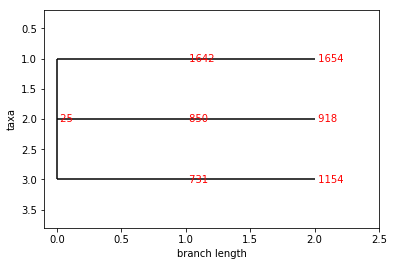

In [190]:
tree.ladderize()
#matplotlib.rc('font', size=10)
#fig = plt.figure(figsize=(10,20), dpi=100)
#axes = fig.add_subplot(1,1,1)
Phylo.draw(tree3, label_colors={k:'red' for k in idds})
plt.show()

In [162]:
def keep_living(tree, living):
    leaves = tree.get_terminals()
    ids = []
    for i in leaves: ids.append(i.name)
    while not set(ids).issubset(set(living)) > 0:
        print len(leaves)
        for leaf in leaves:
            if not leaf.name in living:
                tree.prune(leaf)
        leaves = tree.get_terminals()
        ids = []
        for i in leaves: ids.append(i.name)